# Nearest Neighbors


This notebook calculates the nearest neighbors for every earthquake in a given Flinn-Engdahl region. Near neighbors (NN) is a non-parametric method used for classification. For which the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its NN. NN takes into account both the spatial placement of a point  and the values of the attributes at the point when determining neighbors.  

Near neighbors is particularly useful in this study for seeing how ‘linked’ earthquakes are to one another. It is commonly accepted that both in the days before and after a large magnitude event there will be a large uptick in seismic activity. By performing a NN on the data information will be gleaned as to which earthquake maybe the related to each other and therefore all apart of the same seismic event. 

For this study the maximum bounding searching distance of each point’s neighbors was determined by calculating the distance of every point to its closest neighbor and then choosing the distance which is max as the threshold so that every point has at least one neighbor, the closest neighbors were determined via k nearest neighbors, which simply finds the closest neighboring point. The minimum distance was always set to zero. 

Near neighbours were determined per a region by based on whether their Euclidean distance was greater than and less than the upper and lower bounds by Great Circle distance in kilometers. 



Due to the long computational time, we will be calculating the nearest neighbors within the Flinn-Engdahl region which contain the 10 highest magitude earthquakes and the 10 lowest magitude earthquakes.

### The data must be loaded first

In [22]:
#read in R script containing useful functions to get us going with the data
#more detailed descriptions for each function can be found inside the R script file
source('initialize_data.R', echo = FALSE)

In [2]:
load_libraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')
Checking rgeos availability: TRUE

Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map

Google's Terms of Ser

[1] "libraries loaded successfully"


In [3]:
#Explicit location of main project data
path <- "~/jupyter/cs2019_Group11/GroupProducts/data" 

#create df from main project data
df <- loadFiles(path) %>%
    reqCols %>%
    parseDt('time')

#create spatial point df
dfsp <- tospdf(df)

Files in "~/jupyter/cs2019_Group11/GroupProducts/data" loaded.
Subset Completed.
Parsed column: time.
spatial df created


In [23]:
base_world <- base_world()

tectonicdata = "~/jupyter/cs2019_Group11/GroupProducts/fe.kmz"
tectonicFeatures <- readOGR(tectonicdata)

OGR data source with driver: LIBKML 
Source: "/dsa/home/jaw56m/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(tectonicdata):
“Z-dimension discarded”

In [4]:
#takes about 10 minutes to run
#adds Flinn-Engdahl regions to spatial point df and converts coordinate system
tpts <-regions_data(dfsp)

OGR data source with driver: LIBKML 
Source: "/dsa/home/jaw56m/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(tectonicdata):
“Z-dimension discarded”

[1] "No earthquakes in region:  25"
[1] "No earthquakes in region:  44"
[1] "No earthquakes in region:  76"
[1] "No earthquakes in region:  103"
[1] "No earthquakes in region:  112"
[1] "No earthquakes in region:  130"
[1] "No earthquakes in region:  132"
[1] "No earthquakes in region:  226"
[1] "No earthquakes in region:  325"
[1] "No earthquakes in region:  327"
[1] "No earthquakes in region:  367"
[1] "No earthquakes in region:  369"
[1] "No earthquakes in region:  370"
[1] "No earthquakes in region:  379"
[1] "No earthquakes in region:  381"
[1] "No earthquakes in region:  383"
[1] "No earthquakes in region:  417"
[1] "No earthquakes in region:  435"
[1] "No earthquakes in region:  436"
[1] "No earthquakes in region:  444"
[1] "No earthquakes in region:  448"
[1] "No earthquakes in region:  472"
[1] "No earthquakes in region:  481"
[1] "No earthquakes in region:  482"
[1] "No earthquakes in region:  491"
[1] "No earthquakes in region:  493"
[1] "No earthquakes in region:  497"
[1] 

In [5]:
tpts_df <- as.data.frame(tpts)
tpts_df$latitude = df$latitude
tpts_df$longitude = df$longitude
tpts_df$coords.x1 = NULL
tpts_df$coords.x2 = NULL
head(tpts_df)


depth,mag,time,id,updated,newname,latitude,longitude
2.000,2.6,1999-07-01 23:29:27,usp0009awp,2014-11-07 01:08:01,374,45.4500,3.790
4.613,3.1,1999-07-01 22:10:51,uw10474128,2016-07-23 18:59:57,6,46.7105,-122.778
106.800,4.2,1999-07-01 21:42:41,usp0009awk,2014-11-07 01:08:01,1,51.9950,177.972
26.100,3.9,1999-07-01 20:50:11,usp0009awh,2014-11-07 01:08:01,53,-31.7260,-72.053
136.300,3.1,1999-07-01 19:52:19,usp0009awf,2014-11-07 01:08:01,24,59.8900,-153.560
30.200,3.8,1999-07-01 19:52:12,usp0009awe,2014-11-07 01:08:01,741,36.0500,31.166


### Top and bottom magintudes Flinn-Engdahl regions

Due to due the limits of the server and the large computational power needed for the calculation of nearest neighbors, only 20 will be determined. 

In [6]:
#grouping and summarising by max mag
tpts_df_mm = tpts_df %>% group_by(newname) %>% summarise(max(mag))

#changing column name to max_mag for easier use
colnames(tpts_df_mm) <- c('newname', 'max_mag')

#ordering by descending max_mag
tpts_df_mm = arrange(tpts_df_mm, desc(max_mag))

#displaying top then regions and their max_mags
top_ten_mag_regions = head(tpts_df_mm, 10)
top_ten_mag_regions

newname,max_mag
197,9.1
570,9.1
54,8.8
593,8.6
191,8.4
65,8.4
171,8.3
553,8.3
669,8.3
60,8.2


In [7]:
tpts_df_mm = tpts_df %>% group_by(newname) %>% summarise(max(mag))

#changing column name to max_mag for easier use
colnames(tpts_df_mm) <- c('newname', 'max_mag')

#ordering by descending max_mag
tpts_df_mm = arrange(tpts_df_mm, max_mag)

#displaying bottom then regions and their max_mags
bottom_ten_mag_regions = head(tpts_df_mm, 10)
bottom_ten_mag_regions

newname,max_mag
518,2.60
597,2.60
430,2.70
478,2.80
400,2.90
622,2.90
425,2.95
740,2.98
384,3.00
432,3.00


These are the bottom 10 mag earthquake regions 

In [47]:
values  = c('518', '597','430','400','622','425','740','384','387') #these are the 10 bottom regions
values = as.data.frame(values)

In [48]:
for (i in 1:nrow(values)){
    name =  values[i, ]
  neighbors = near_neighbors(values[i, ], tpts)
}
#this loops runs a function that returns the nearest neighbors for each region

[1] "518"
Neighbour list object:
Number of regions: 3 
Number of nonzero links: 4 
Percentage nonzero weights: 44.44444 
Average number of links: 1.333333 
Link number distribution:

1 2 
2 1 
2 least connected regions:
1 3 with 1 link
1 most connected region:
2 with 2 links
NULL


Warning message in knearneigh(region, k = 1):
“k greater than one-third of the number of data points”

[1] "597"
Neighbour list object:
Number of regions: 2 
Number of nonzero links: 2 
Percentage nonzero weights: 50 
Average number of links: 1 
Link number distribution:

1 
2 
2 least connected regions:
1 2 with 1 link
2 most connected regions:
1 2 with 1 link
NULL
[1] "430"
Neighbour list object:
Number of regions: 4 
Number of nonzero links: 8 
Percentage nonzero weights: 50 
Average number of links: 2 
Link number distribution:

1 2 3 
1 2 1 
1 least connected region:
3 with 1 link
1 most connected region:
4 with 3 links
NULL
[1] "400"       "one entry"
[1] "622"       "one entry"


Warning message in knearneigh(region, k = 1):
“k greater than one-third of the number of data points”

[1] "425"
Neighbour list object:
Number of regions: 2 
Number of nonzero links: 2 
Percentage nonzero weights: 50 
Average number of links: 1 
Link number distribution:

1 
2 
2 least connected regions:
1 2 with 1 link
2 most connected regions:
1 2 with 1 link
NULL
[1] "740"       "one entry"
[1] "384"
Neighbour list object:
Number of regions: 3 
Number of nonzero links: 4 
Percentage nonzero weights: 44.44444 
Average number of links: 1.333333 
Link number distribution:

1 2 
2 1 
2 least connected regions:
2 3 with 1 link
1 most connected region:
1 with 2 links
NULL
[1] "387"
Neighbour list object:
Number of regions: 7 
Number of nonzero links: 18 
Percentage nonzero weights: 36.73469 
Average number of links: 2.571429 
Link number distribution:

1 2 3 4 
2 1 2 2 
2 least connected regions:
1 2 with 1 link
2 most connected regions:
3 4 with 4 links
NULL


In [10]:
ave_link_low = (2.6 + 1.3 + 1 + 2 + 1 + 1.3)/6 

print(paste('Average number of links for the low magnitude Flinn-Engdahl regions = ', ave_link_low))

[1] "Average number of links for the low magnitude Flinn-Engdahl regions =  1.53333333333333"


These are the top 10 mag earthquake regions 

In [43]:
values2  = c('197','570','54','593','65','191','171','553','669','60') #these are the 10 top regions
values2 = as.data.frame(values2)

In [49]:

for (i in 1:nrow(values2)){
    name =  values2[i, ]
  neighbors = near_neighbors(values2[i, ], tpts)
}
#this loops runs a function that returns the nearest neighbors for each region
#note this takes a very long time to run 

[1] "197"
Neighbour list object:
Number of regions: 5364 
Number of nonzero links: 399200 
Percentage nonzero weights: 1.387436 
Average number of links: 74.42207 
Link number distribution:

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  4  13  17  23  30  36  31  29  28  30  27  40  36  36  35  28  28  30  26  17 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 26  30  28  44  25  30  44  47  37  39  37  33  38  34  46  36  32  44  41  49 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 30  35  28  42  30  36  40  29  42  27  30  37  33  30  44  34  41  45  46  47 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 55  43  61  54  52  45  51  48  48  64  53  53  56  48  60  49  55  58  66  52 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 48  70  55  65  51  46  54  53  54  46  43  52  60  54  51  39  42  41  52  39 

Warning message in knearneigh(region, k = 1):
“knearneigh: identical points found”

[1] "54"
Neighbour list object:
Number of regions: 10824 
Number of nonzero links: 8029342 
Percentage nonzero weights: 6.853373 
Average number of links: 741.8091 
Link number distribution:

   1    2    3    4    5    6    8    9   10   11   13   14   15   16   17   18 
   4    4    5    4    1    1    1    1    1    1    1    1    1    2    2    2 
  19   21   22   23   25   26   27   28   30   31   32   33   34   35   36   37 
   3    3    6    3    1    1    2    2    1    3    4    7    6    2    4    2 
  38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53 
   2    3    2    3    3    4    6    2    4    1    3    3    7    8    7    4 
  54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69 
   7    5    6    4    7    8    5    3    2    9   10    6    8    2    7    8 
  70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85 
   4    7    8    6    8   10    5    7   10    5    7   10   13   18    9    7

Warning message in knearneigh(region, k = 1):
“knearneigh: identical points found”

[1] "593"
Neighbour list object:
Number of regions: 4120 
Number of nonzero links: 4234936 
Percentage nonzero weights: 24.94896 
Average number of links: 1027.897 
Link number distribution:

   1    3    4    7   10   11   14   20   23   41   49   53   60   67   71   74 
   1    1    1    1    1    2    1    1    1    1    1    2    1    1    1    1 
  81   82   85   89   90   91   92   93   94   95   96  100  101  102  104  105 
   1    2    2    2    1    2    4    3    1    1    1    1    2    2    1    4 
 106  107  108  109  110  111  112  114  116  117  119  120  121  123  124  125 
   1    2    1    2    1    2    4    1    1    1    1    1    4    2    3    1 
 126  127  128  129  130  131  132  133  134  135  136  137  138  139  141  142 
   2    3    1    7    2    3    3    2    1    1    4    1    2    1    1    1 
 143  145  147  149  151  154  155  158  160  162  163  164  165  166  167  169 
   5    1    1    2    1    1    1    1    1    2    2    1    1    2    1    1

Warning message in knearneigh(region, k = 1):
“knearneigh: identical points found”

[1] "191"
Neighbour list object:
Number of regions: 3239 
Number of nonzero links: 3129822 
Percentage nonzero weights: 29.83306 
Average number of links: 966.2927 
Link number distribution:

   1    3    4   12   13   14   18   23   27   29   47   51   56   65   68   91 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  92   97   99  100  101  104  108  109  110  111  112  114  115  116  117  118 
   1    1    2    1    5    1    5    4    3    1    2    1    1    3    2    4 
 119  120  121  123  124  125  127  128  129  132  133  134  135  137  138  139 
   2    3    1    1    1    1    2    5    3    1    1    2    1    1    1    1 
 142  145  146  147  149  150  151  152  153  156  158  160  161  162  163  166 
   1    2    2    1    1    1    1    1    1    1    3    2    1    1    2    2 
 170  172  173  174  178  180  183  184  185  186  191  192  194  195  197  200 
   1    2    1    1    2    1    1    1    1    1    1    2    1    1    1    2

Warning message in knearneigh(region, k = 1):
“knearneigh: identical points found”

[1] "171"
Neighbour list object:
Number of regions: 4533 
Number of nonzero links: 754012 
Percentage nonzero weights: 3.669499 
Average number of links: 166.3384 
Link number distribution:

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   3   2   2   5   8   5   5   6   3   5   6  10   8   8   5   8   8  14  12 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 11  12  15  14  14  11  15  15  22  18  29  16  23  29  19  19  15  30  26  18 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 24  31  26  24  29  24  24  27  26  19  20  16  25  16  24  25  31  24  14  32 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 11  22  21  18  22  20  20  24  24  17  25  25  35  26  24  15  17  24   7  22 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 18  22  17  12  12  15  11  18  13  15   8  14  15  12  11  16  18  19  14   9 

In [13]:
ave_link_big = (24 + 217 + 136 + 166 + 966 + 64 + 1028 + 742 + 173 + 74)/10

print(paste('Average number of links for the high magnitude Flinn-Engdahl regions = ', ave_link_big))

[1] "Average number of links for the high magnitude Flinn-Engdahl regions =  359"


### Mapping regions

Again, due to the limits of the server and the large computational power needed for the calculation of nearest neighbors only a subset of regions will have their neighbors plotted. Being that serval of the top magnitude Flinn-Engdahl regions in in the general area of Indonesia, it was decided that regions which correspond to Indonesia should be mapped with their Nearest Neighbors. 

First must calculate the nearest neighbors in the Indonesia area.



In [52]:
df = " "
listoflist = list()
values  = as.data.frame(c(593, 594, 191, 193, 205, 501, 213, 208, 177, 123, 121, 178, 541, 192, 723, 670, 724, 
                          210, 712, 211, 487, 206, 184, 182, 143, 713, 144, 163, 183, 185, 601, 186, 187, 
                         188, 207)) #region in the Indonesia area
for (i in 1:35){
area = subset(tpts, newname == values[i,]) #get the regions
if (length(area)>0){
area2 <- knn2nb(knearneigh(area, k=1)) #get nearest negihbors for the max distance to a neighbor
all.linked <- max(unlist(nbdists(area2, area)))  
gc.nb <- dnearneigh(area, 0, all.linked) #get near neighbor groups
## compute cardinality of neighborhoods (# of neighbors)
listoflist[[i]] <- card(gc.nb)} #save out of loop 
else {print('none')}
}



Warning message in knearneigh(area, k = 1):
“knearneigh: identical points found”Warning message in knearneigh(area, k = 1):
“knearneigh: identical points found”

[1] "none"


Warning message in knearneigh(area, k = 1):
“k greater than one-third of the number of data points”Warning message in knearneigh(area, k = 1):
“knearneigh: identical points found”Warning message in knearneigh(area, k = 1):
“knearneigh: identical points found”Warning message in knearneigh(area, k = 1):
“knearneigh: identical points found”

In order to be able to match the calculated nearest neighbors, the which correspond to the Indonesia earthquakes must be subset. The tectonic features must be subset to have the shapes of each regions to plot. The converted from spatial points to data frame of the earthquake data must be subset in order to grab the latitudes and longitudes for mapping. Lastly, the spatial points must be subset as well to have the nearest neighbors attributes.

In [72]:
region = subset(tpts, newname == 593 | newname == 594 | newname == 191 | newname == 193 | newname == 205 | newname == 501
                | newname == 213 | newname == 208 | newname == 177 | newname == 123 | newname == 121 | newname == 178
                | newname ==541 | newname == 192 | newname == 723 | newname == 670 | newname == 724 | newname == 210
                | newname == 712 | newname == 211 | newname == 487 | newname == 206 | newname == 184 | newname == 182
                | newname ==143 | newname == 713 | newname == 144 | newname == 163 | newname == 183 | newname == 185
                | newname == 601 | newname == 186 | newname == 187 | newname == 188 | newname == 207)

region_df = subset(tpts_df, newname == 593 | newname == 594 | newname == 191 | newname == 193 | newname == 205 | newname == 501
                | newname == 213 | newname == 208 | newname == 177 | newname == 123 | newname == 121 | newname == 178
                | newname ==541 | newname == 192 | newname == 723 | newname == 670 | newname == 724 | newname == 210
                | newname == 712 | newname == 211 | newname == 487 | newname == 206 | newname == 184 | newname == 182
                | newname ==143 | newname == 713 | newname == 144 | newname == 163 | newname == 183 | newname == 185
                | newname == 601 | newname == 186 | newname == 187 | newname == 188 | newname == 207)

tectonicFeatures@data$newname <- seq.int(nrow(tectonicFeatures))#this adds in an id which is the same 
#as the newname in the tpts to match regions with earthquakes

tect = subset(tectonicFeatures, newname == 593 | newname == 594 | newname == 191 | newname == 193 | newname == 205 | newname == 501
                | newname == 213 | newname == 208 | newname == 177 | newname == 123 | newname == 121 | newname == 178
                | newname ==541 | newname == 192 | newname == 723 | newname == 670 | newname == 724 | newname == 210
                | newname == 712 | newname == 211 | newname == 487 | newname == 206 | newname == 184 | newname == 182
                | newname ==143 | newname == 713 | newname == 144 | newname == 163 | newname == 183 | newname == 185
                | newname == 601 | newname == 186 | newname == 187 | newname == 188 | newname == 207)


Now the list of nearest neighbors is added to the spatial points data frame. Then it is converted to a data frame and the subset longitude and latitudes from earlier are added and the converted, incorrect longitude and latitudes, are removed.

In [56]:
points <- unlist(listoflist)
region@data$nneigh <- points
df = as.data.frame(region)
df$latitude = region_df$latitude
df$longitude = region_df$longitude
df$coords.x1 = NULL
df$coords.x2 = NULL


Want to label the Flinn-Engdahls within Indonesia with their numeric names, do to so need to find the centers of each region.

In [88]:
PolyCentroids <- gCentroid(tect, byid=TRUE)#find centers 

labels = as.data.frame(PolyCentroids) #convert for ggplot
labels$name = c(593, 594, 191, 193, 205, 501, 213, 208, 177, 123, 121, 178, 541, 192, 723, 670, 724, 
                          210, 712, 211, 487, 206, 184, 182, 143, 713, 144, 163, 183, 185, 601, 186, 187, 
                         188, 207)# these are the labels to be written


Now the data is ready for mapping.  

Regions defined for each Polygons
Warning message:
“Removed 38 rows containing missing values (geom_point).”Warning message:
“Removed 29665 rows containing missing values (geom_path).”

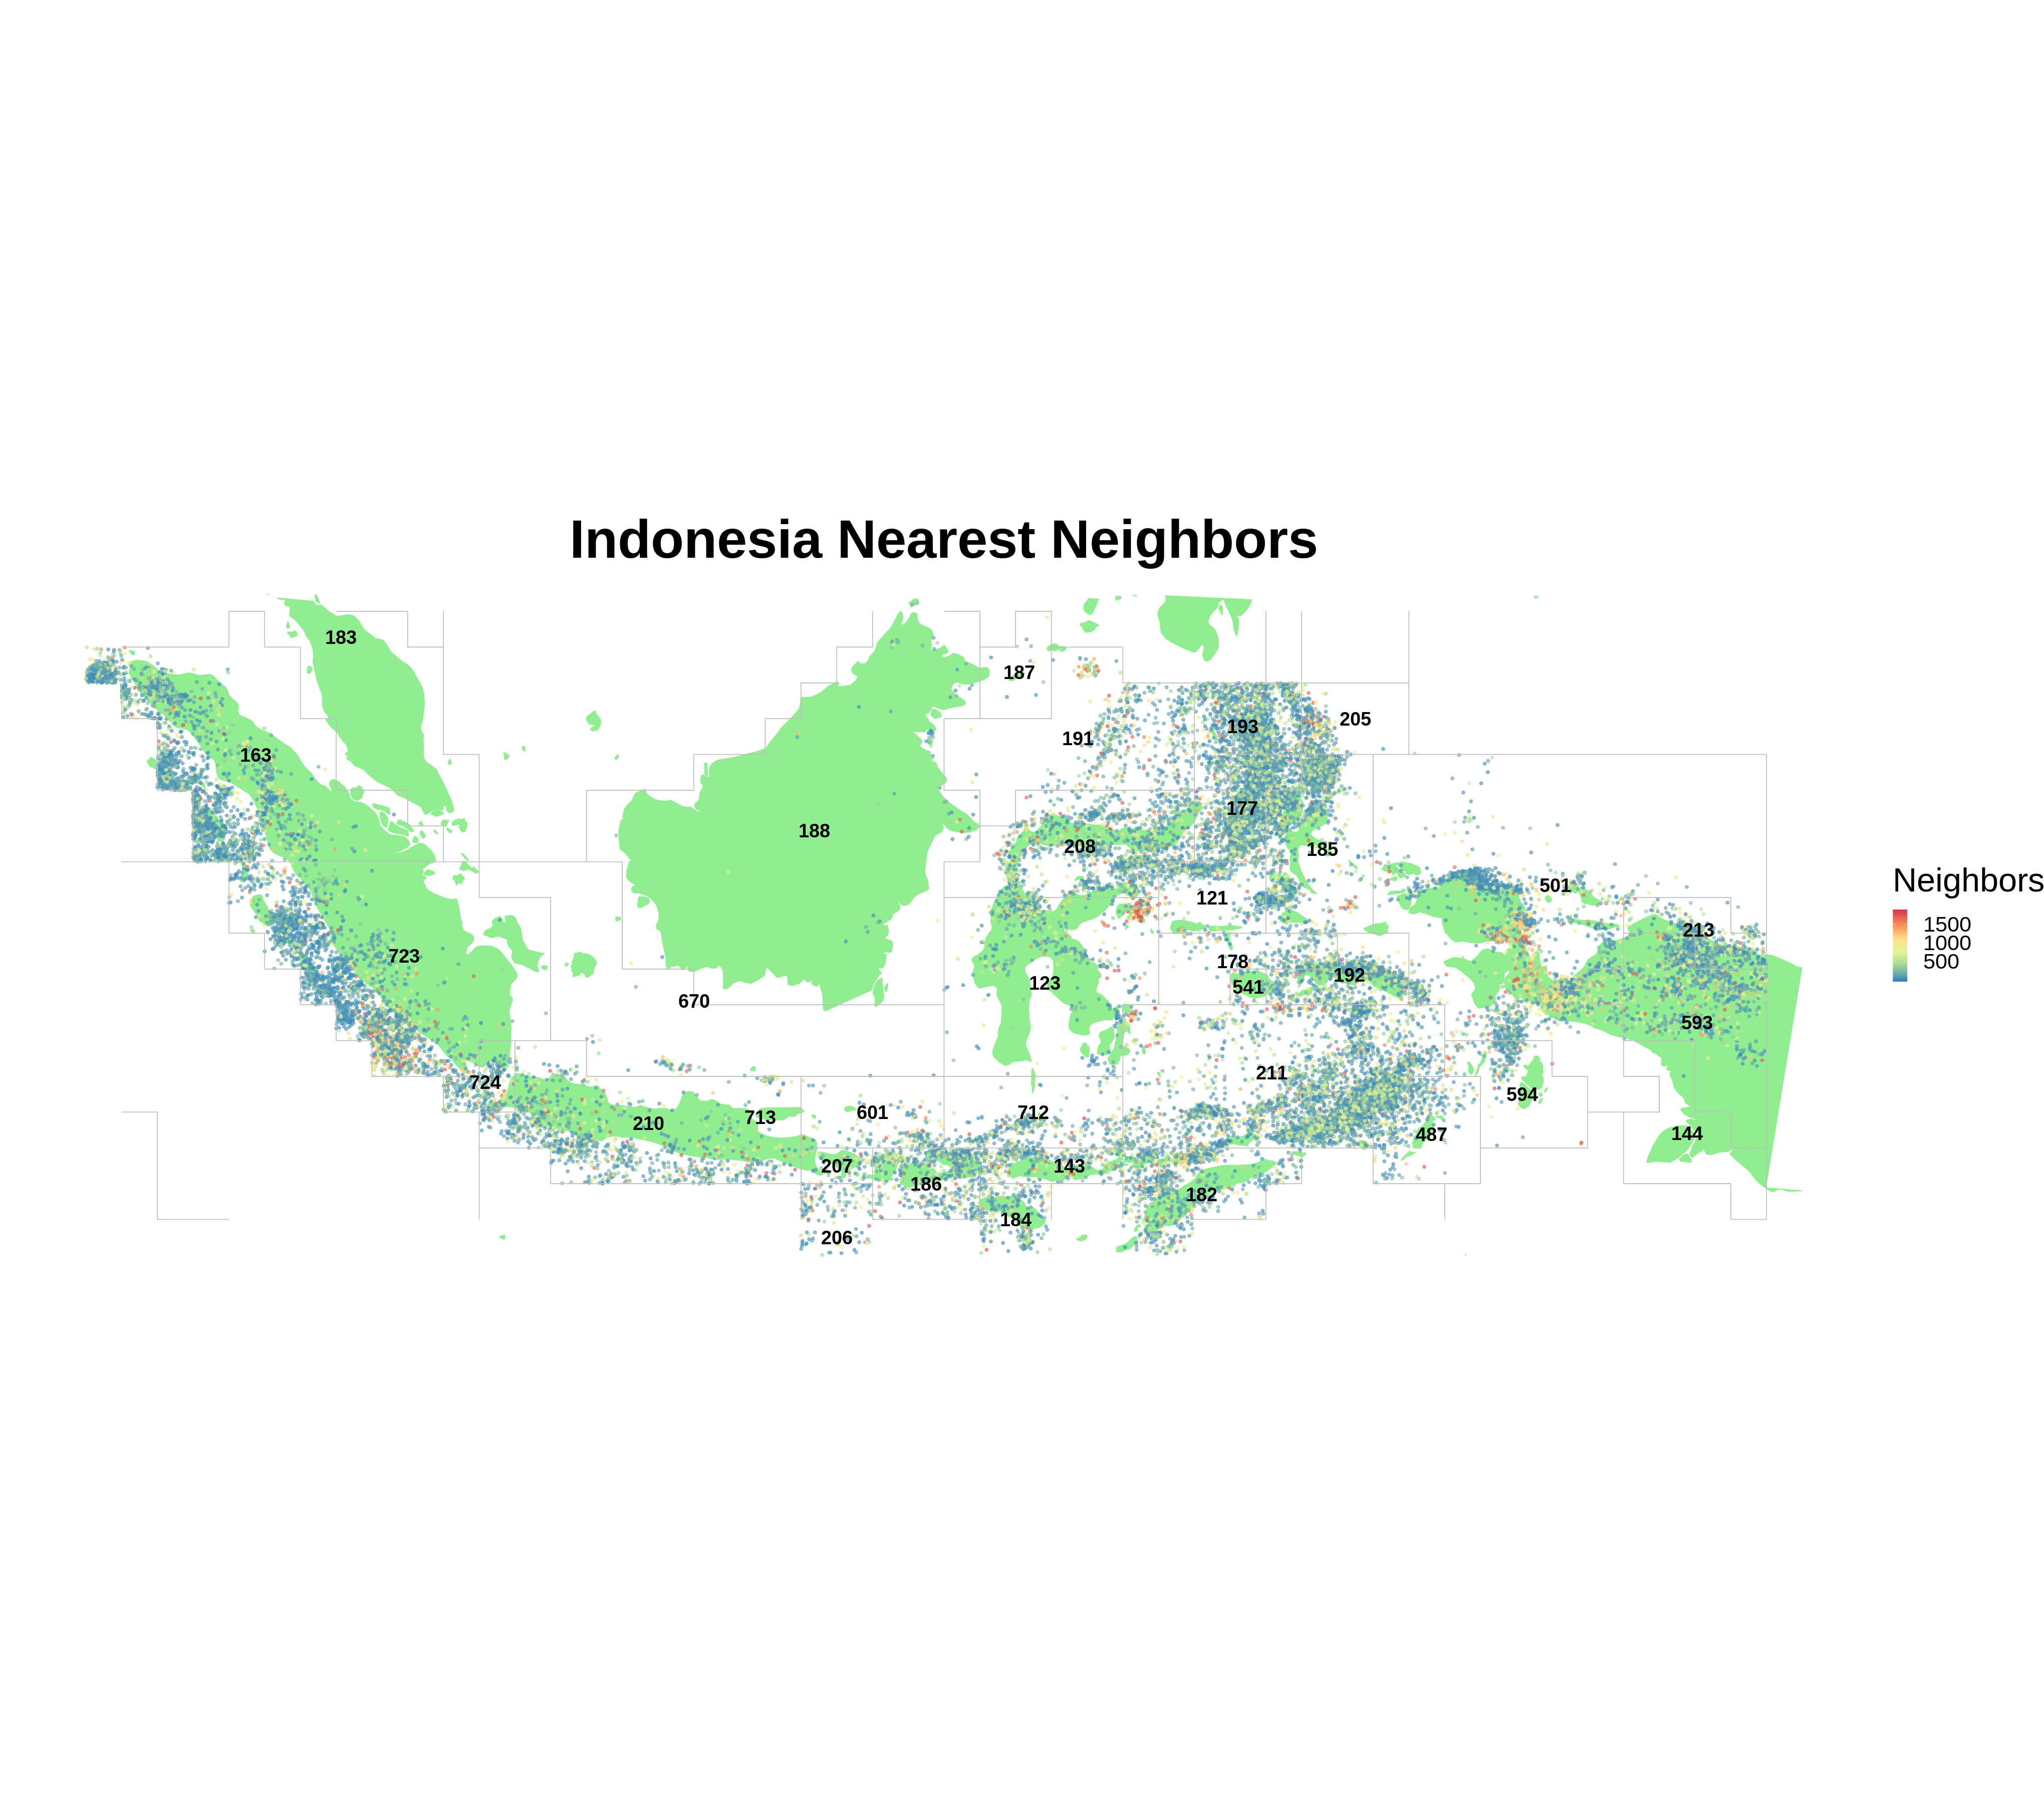

In [87]:
options(repr.plot.width=34, repr.plot.height=30)
#make map bigger 
    world_map <- map_data("world") 

    p = ggplot() + coord_fixed() +
      xlab("") + ylab("") 
    #Here I create a blank canvas to map on

    #Add map to base plot
    world_messy <- p + geom_polygon(data=world_map, aes(x=long, y=lat, group=group), 
                               colour="light green", fill="light green") 
    # This is where the continents are drawn on my canvas creating the map

    base_world = world_messy + theme_void() 
    #This is where I add my simple theme to the map
     small = base_world + xlim(94,142) + ylim(-11,7.5)
    #this is the Indonesia area

world_earthquakes = small + geom_point(data=df,aes(x=longitude, y=latitude, color= nneigh), alpha=I(.6)) 
# Here I take the map I've made and add the locations for each earthquake and color it by number of neighbors  

world_earthquakes + 
geom_path(data = tectonicFeatures, 
          aes(x = long, y = lat, group = group),
          color = 'gray', size = .4)+
geom_text(data = labels, aes(x = x, y = y, label = name), size = 8, fontface = 'bold', color = "black")+
#I add the Flinn-Engdahl regions and their labels 

theme(strip.background = element_rect(colour="black", fill="white", 
                                       size=1.5, linetype="blank"),strip.text = element_text(size=30),
     legend.text=element_text(size=26), legend.title=element_text(size=40))+
#I want to change the default title displays for the facets to something cleaner

scale_color_distiller(palette='Spectral') + 
# I change the default color to reds and blues as it contrasts well with the green continents 

labs(color = "Neighbors")+
# I rename the legend title to the full name

ggtitle("Indonesia Nearest Neighbors") +
# I give a proper title

theme(plot.title = element_text(hjust = 0.5, size = 65, face = "bold"))


The map above displays the Flinn-Engdahl regions of Indonesia. 

This area has many earthquakes and they all have many near neighbors. With the lower limit being 500 and the upper limit being 1500. What this indicates is that these earthquakes in the neighbor groups are likly all related to each other, meaning that they are all apart of the same seismic event. 